In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Advertising And Sales.csv")

# Display first few rows
print(df.head())

   ID     TV  Radio  Newspaper  Sales
0   1  230.1   37.8       69.2   22.1
1   2   44.5   39.3       45.1   10.4
2   3   17.2   45.9       69.3    9.3
3   4  151.5   41.3       58.5   18.5
4   5  180.8   12.8       58.4   12.9


In [2]:
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
               ID          TV      Radio   Newspaper     Sales
count  200.000000  200.000000  200.00000  200.000000  200.0000
mean   100.500000  147.032500   23.28950   30.554000   14.0380
std     57.879185   85.885186   14.86997   21.778621    5.2094
min      1.000000    0.700000    0.00000    0.300000    1.6000
25%     50.750000   74.375000   10.07500   12.750000   10.4000
50%    100.500000  149.750000   22.90000   25.750000   12.9000
75%    150.250000  218.825000   36.52500   45.100000   17.4000
max    200.000000  296.400000   49.60000  114.000000   27

In [3]:
print(df.isnull().sum())  # Count missing values per column

ID           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


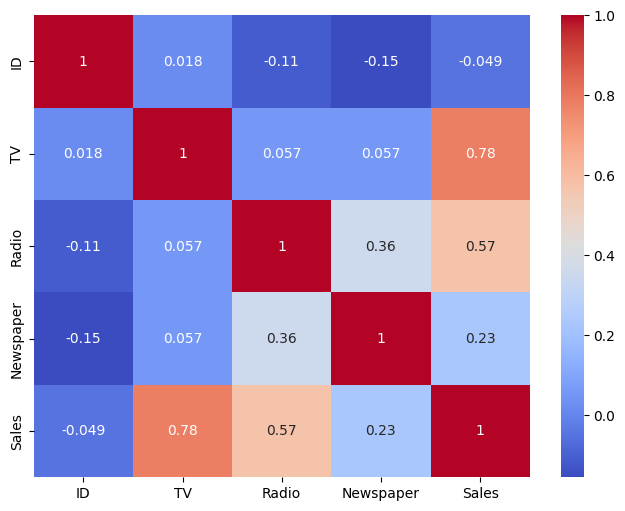

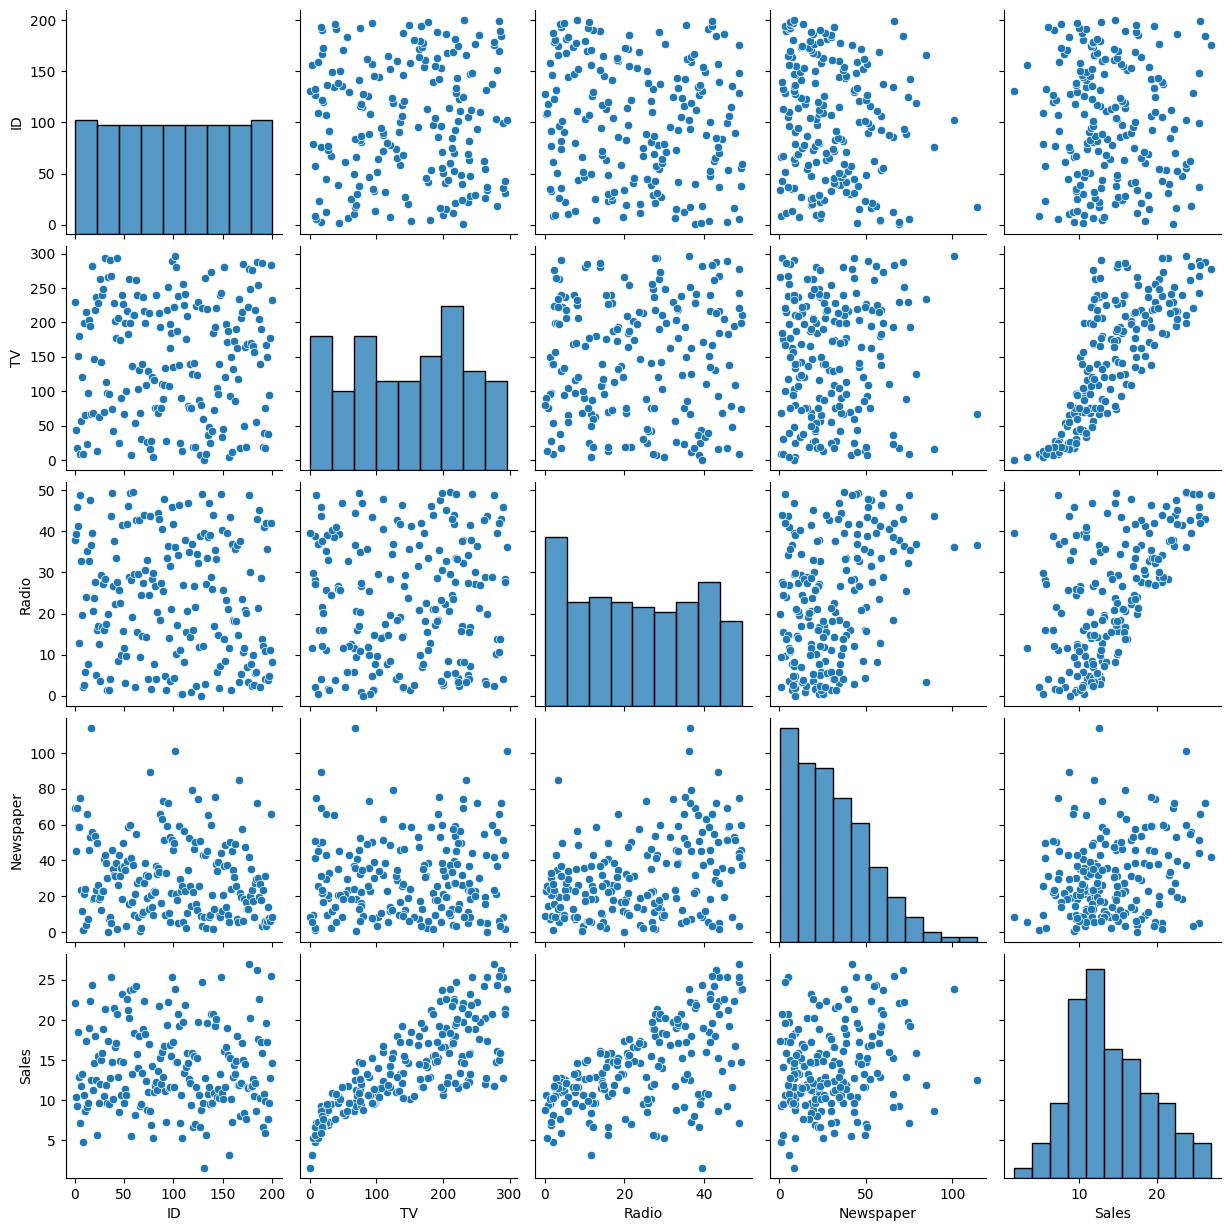

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Pairplot
sns.pairplot(df)
plt.show()

In [5]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["ID", "Sales"])  # Features
y = df["Sales"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1.4520819111817602
R² Score: 0.899969103117516


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = best_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R² Score:", r2)

MAE: 0.6370500000000019
R² Score: 0.9815425093189839


In [19]:
import pickle

In [20]:
with open("model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("✅ Model saved as 'model.pkl'")

✅ Model saved as 'model.pkl'
